In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
np.random.seed(42)

C:\Users\mateu\AppData\Local\Temp\ipykernel_21828\1704286033.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [4]:
class Node:
    def __init__(self, id, value):
        self.id = id
        self.value = value

    def __str__(self) -> str:
        return str(self.value)
    
    def __repr__(self) -> str:
        return f"{self.id}/{self.value}"

def edge_cost(frag1:str, frag2:str):
    if frag1 == frag2:
        return 0
    cost = len(frag1)
    for i in range(len(frag1)):
        sub1 = frag1[i+1:]
        sub2 = frag2[0:-i-1]
        # print(sub1, sub2)
        if sub1 == sub2:
            return i+1
    return cost

def create_cost_matrix(nodes):
    matrix = np.zeros([len(nodes), len(nodes)])
    for frag_from in nodes:
        for frag_to in nodes:
            cost = edge_cost(frag_from.value, frag_to.value)
            matrix[frag_from.id][frag_to.id] = cost
    return matrix



In [35]:
input_file = "9.200-40.txt"
fragment_len = 10
max_seq_len = 209 # changes with different files
max_nodes = 200

population = 5
cost_threshold = 7

fragments = []
with open(input_file) as f:
    fragments = f.read().splitlines()


# fragments = ["ACT", "CTC", "GCC", "TCT", "TGG"]

print(fragments)

cost = edge_cost("ACGAA", "ACGAA")

nodes =[ Node(id, frag) for id,frag in enumerate(fragments)]

cost_matrix = create_cost_matrix(nodes)
print(cost_matrix)


['AAGGCCGGCT', 'ACACCCGCCG', 'ACCAGGGCGT', 'ACCATGGATG', 'ACCCGCCGCC', 'ACGATGCCCC', 'AGAAGGATTC', 'AGCTCACCAT', 'AGGCACCAGG', 'AGGCCGGCTT', 'AGGGCGTGAT', 'ATATCGCCGC', 'ATCCGCCGCC', 'ATCGCCGCGC', 'ATGATATCGC', 'ATGATGATAT', 'ATGCCCCCCG', 'ATGGATGATG', 'CAAGGCCGGC', 'CACACCCGCC', 'CACCCGCCGC', 'CAGAAGGATT', 'CAGCTCACCA', 'CAGGCACCAG', 'CAGGGCGTGA', 'CATGGATGAT', 'CATGGGTCAG', 'CATGTGCAAG', 'CCACACCCGC', 'CCAGCTCACC', 'CCAGGCACCA', 'CCAGGGCGTG', 'CCATCGTGGG', 'CCATGGATGA', 'CCCAGGCACC', 'CCCCAGGCAC', 'CCCCCCGGGC', 'CCCCCGGGCC', 'CCCCGGGCCG', 'CCCCTCCATC', 'CCCGCCGCCA', 'CCCGGGCCGT', 'CCCGTCCACA', 'CCCTCCATCG', 'CCGATCCGCC', 'CCGCCGCCAG', 'CCGCCGCCCG', 'CCGCGCTCGT', 'CCGGCTTCGC', 'CCGGGCCGTC', 'CCGTCCACAC', 'CCGTCTTCCC', 'CCTATGTGGG', 'CCTCCATCGT', 'CGACAACGGC', 'CGACGATGCC', 'CGATCCGCCG', 'CGATGCCCCC', 'CGCCAGCTCA', 'CGCCCCAGGC', 'CGCCCGTCCA', 'CGCCGCCAGC', 'CGCCGCGCTC', 'CGCGCTCGTC', 'CGCGGGCGAC', 'CGCTCGTCGT', 'CGGCATGTGC', 'CGGCTCCGGC', 'CGGCTTCGCG', 'CGGGCCGTCT', 'CGGGCGACGA', 'CGTC

In [23]:
id = 34
avialble_ids = [1,4,5,12,18,25]
print(cost_matrix[id])
cost_matrix[id][avialble_ids]
# sorted(cost_matrix[id][avialble_ids])[1]

[10. 10.  7.  7.  7. 10. 10. 10.  3. 10. 10. 10. 10. 10. 10. 10. 10. 10.
  9.  9.  6.  9.  9.  2.  9.  9.  9.  9.  8.  8.  1.  8.  8.  8.  0.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10. 10. 10. 10.
 10.  5. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


array([10.,  7., 10., 10.,  9.,  9.])

In [31]:
import random
def sequence_length(sequence, cost_matrix, fragment_len):
    length = fragment_len
    for node1, node2 in zip(sequence, sequence[1:]):
        length += cost_matrix[node1.id][node2.id]
    return length

def random_good_path(nodes, cost_matrix,  max_seq_len):
    nodes_local = nodes.copy()
    sequence = []
    current = random.choice(nodes_local)
    sequence.append(current)
    nodes_local.remove(current)
    current_seq_len = len(current.value)

    can_continue = True
    while can_continue:
        avialble_ids = [x.id for x in nodes_local]
        min_distance = min(cost_matrix[current.id][avialble_ids])
        closest_nodes = [ x for x in nodes_local if cost_matrix[current.id][x.id]==min_distance ]
        next_node = random.choice(closest_nodes)
        
        current_seq_len +=  cost_matrix[current.id][next_node.id]
        if current_seq_len <= max_seq_len:
            sequence.append(next_node)
            nodes_local.remove(next_node)
            current = next_node
        else:
            can_continue = False
            break   
    return sequence

def generate_initial_pop(nodes, cost_matrix, population_num, max_seq_len):
    population = []

    for i in range(population_num):
        population.append(random_good_path(nodes, cost_matrix, max_seq_len))
    return population

    # for i in range(int(max_seq_len/fragment_len), int(max_seq_len/fragment_len) + 10):
    #     sample = random.sample(nodes, i)
    #     pop = [np.random.permutation(sample) for _ in range(100000)]
    #     for sequence in pop:
    #         length = sequence_length(sequence, cost_matrix)
    #         if length < max_seq_len:
    #             population.append(sequence)
    # population_sorted = sorted(population, key=lambda x: len(x), reverse=True)
    # final_pop = population_sorted[:population_num]
    # return final_pop


initial_population = generate_initial_pop(nodes, cost_matrix, population, max_seq_len)
for sequence in initial_population:
    print(len(sequence), sequence_length(sequence, cost_matrix, fragment_len))

143 209.0
138 209.0
135 205.0
147 208.0
139 206.0


In [36]:
def propabilities(population, cost_matrix):
    def f1(sequence):
        no_nodes = len(sequence) / max_nodes
        length = sequence_length(sequence, cost_matrix, fragment_len) / max_seq_len
        F1 = 2 * (no_nodes * length) / (no_nodes + length)
        return F1
    
    scores = np.asarray(
        [f1(x) for x in population]
    )

    seq_propabilities = scores / np.sum(scores)
    return seq_propabilities
    
propabilities(initial_population, cost_matrix)

array([0.20283621, 0.19863965, 0.19453196, 0.20568745, 0.19830473])

In [29]:
cities = [0, 1, 2, 3, 4]

adjacency_mat = np.asarray(
    [
        [0.00, 28.02, 17.12, 27.46, 46.07],
        [28.02, 0.00, 34.00, 25.55, 25.55],
        [17.12, 34.00, 0.00, 18.03, 57.38],
        [27.46, 25.55, 18.03, 0.00, 51.11],
        [46.07, 25.55, 57.38, 51.11, 0.00],
    ]
)

class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.best = None
        self.adjacency_mat = adjacency_mat

    def fitness(self, chromosome):
        return sum(
            [
                self.adjacency_mat[chromosome[i], chromosome[i + 1]]
                for i in range(len(chromosome) - 1)
            ]
        )

    def evaluate(self):
        distances = np.asarray(
            [self.fitness(chromosome) for chromosome in self.bag]
        )
        self.score = np.min(distances)
        self.best = self.bag[distances.tolist().index(self.score)]
        self.parents.append(self.best)
        if False in (distances[0] == distances): #if not all distances are equal (one is the worse one)
            distances = np.max(distances) - distances #distances are reversed (bigger is better) such the worst one is now value 0
        return distances / np.sum(distances)
    
    def select(self, k=4):
        fit = self.evaluate()
        while len(self.parents) < k:
            idx = np.random.randint(0, len(fit))
            if fit[idx] > np.random.rand():
                self.parents.append(self.bag[idx])
        self.parents = np.asarray(self.parents)

    def breed(self, n_population, p_breed=0.1): #crossover
        children = []
        count, size = self.parents.shape
        for _ in range(n_population):
            if np.random.rand() > p_breed:
                children.append(
                    list(self.parents[np.random.randint(count, size=1)[0]])
                )
            else:
                parent1, parent2 = self.parents[
                    np.random.randint(count, size=2), :
                ]
                idx = np.random.choice(range(size), size=2, replace=False)
                start, end = min(idx), max(idx)
                child = [None] * size
                for i in range(start, end + 1, 1):
                    child[i] = parent1[i]
                pointer = 0
                for i in range(size):
                    if child[i] is None:
                        while parent2[pointer] in child:
                            pointer += 1
                        child[i] = parent2[pointer]
                children.append(child)
        return children
    
    def mutate(self, children, p_mut=0.1):
        next_bag = []
        for child in children:
            if np.random.rand() < p_mut:
                next_bag.append(swap(child))
            else:
                next_bag.append(child)
        return next_bag

def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome



def init_population(cities, adjacency_mat, n_population):
    return Population(
        np.asarray([np.random.permutation(cities) for _ in range(n_population)]), 
        adjacency_mat
    )

def genetic_algorithm(
    cities,
    adjacency_mat,
    n_population=5,
    n_iter=20,
    selectivity=0.15,
    p_breed=0.5,
    p_mut=0.1,
    print_interval=100,
    return_history=False,
    verbose=False,
):
    population = init_population(cities, adjacency_mat, n_population)
    best = population.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        population.select(n_population * selectivity)
        history.append(population.score)
        if verbose:
            print(f"Generation {i}: {population.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {population.score}")
        if population.score < score:
            best = population.best
            score = population.score
        children = population.breed(n_population, p_breed)
        children_mutated = population.mutate(children, p_mut)
        population = Population(children_mutated, population.adjacency_mat)
    if return_history:
        return best, history
    return best



In [30]:
genetic_algorithm(cities, adjacency_mat, verbose=True)

Generation 0: 121.24
Generation 1: 121.24
Generation 2: 121.24
Generation 3: 121.24
Generation 4: 121.24
Generation 5: 121.24
Generation 6: 121.24
Generation 7: 121.24
Generation 8: 121.24
Generation 9: 117.11
Generation 10: 117.11
Generation 11: 115.19999999999999
Generation 12: 115.19999999999999
Generation 13: 115.19999999999999
Generation 14: 115.19999999999999
Generation 15: 115.19999999999999
Generation 16: 115.19999999999999
Generation 17: 115.19999999999999
Generation 18: 115.19999999999999
Generation 19: 115.19999999999999


[2, 3, 1, 4, 0]

In [28]:
def generate_cities(n_cities, factor=10):
    return np.random.rand(n_cities, 2) * n_cities * factor


def make_mat(coordinates):
    res = [
        [get_distance(city1, city2) for city2 in coordinates]
        for city1 in coordinates
    ]
    return np.asarray(res)

def get_distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)


Generation 0: 50958.341559774075
Generation 100: 38367.90302157213
Generation 200: 30931.696444434936
Generation 300: 27280.625407700376
Generation 400: 25134.698234060394
Generation 500: 24063.135393448545
Generation 600: 22980.781623807932
Generation 700: 22413.250877867882
Generation 800: 22230.860597271632
Generation 900: 21867.311852080267


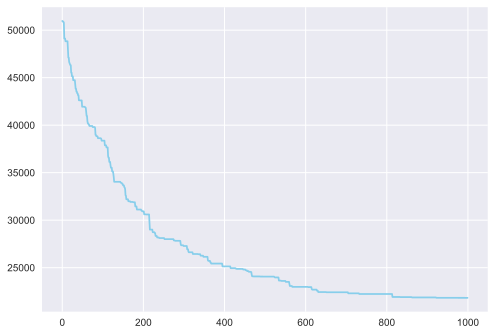

[82, 60, 34, 21, 48, 51, 38, 12, 92, 61, 15, 66, 96, 2, 88, 26, 11, 79, 57, 0, 13, 27, 18, 97, 86, 41, 37, 58, 14, 62, 5, 63, 90, 98, 19, 59, 68, 64, 93, 33, 8, 83, 3, 30, 76, 49, 31, 17, 23, 75, 22, 73, 7, 70, 95, 84, 10, 69, 16, 52, 71, 24, 89, 91, 54, 81, 65, 45, 20, 99, 67, 43, 6, 87, 39, 4, 80, 56, 28, 29, 94, 55, 36, 78, 44, 46, 53, 72, 47, 1, 77, 74, 42, 32, 40, 35, 9, 50, 85, 25]


In [31]:
cities = range(100)
city_coordinates = generate_cities(len(cities))
adjacency_mat = make_mat(city_coordinates)
best, history = genetic_algorithm(
    cities, adjacency_mat, n_population=20, n_iter=1000, verbose=False, return_history=True
)
plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)
